# DBSCAN

In [9]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("C:\\Users\\spoor\\Downloads\\Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
X=dataset[['Annual Income (k$)','Spending Score (1-100)']]

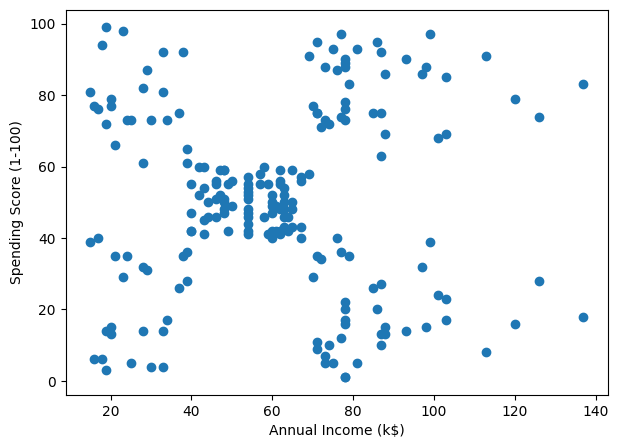

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [14]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_scaled)

In [16]:
print(type(X))


<class 'pandas.core.frame.DataFrame'>


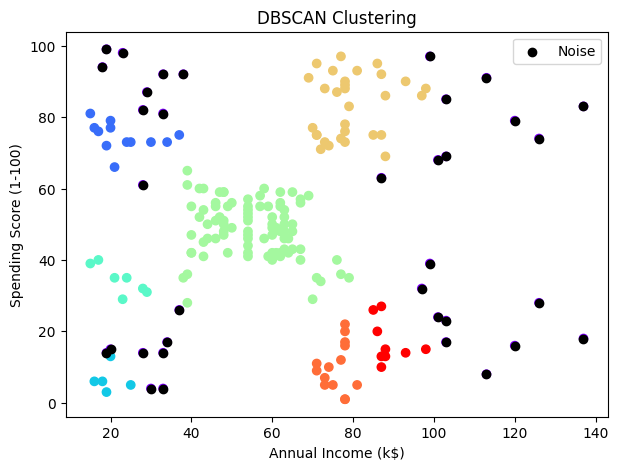

In [17]:
plt.figure(figsize=(7,5))

plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=clusters,
    cmap='rainbow'
)

plt.scatter(
    X.loc[clusters == -1, 'Annual Income (k$)'],
    X.loc[clusters == -1, 'Spending Score (1-100)'],
    color='black',
    label='Noise'n
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title("DBSCAN Clustering")
plt.show()


In [18]:
from sklearn.metrics import *
eps_value=[0.2,0.3,0.5]

for eps in eps_value:
    print(f"\n Evaluting DBSCAN using eps={eps}")
    
    # Apply DBSCAN
    dbscan=DBSCAN(eps=eps,min_samples=5)
    labels=dbscan.fit_predict(X_scaled)

    #Number of Clusters(Ignore Noise label -1)
    unique_labels=set(labels)
    n_clusters=len(unique_labels)-(1 if -1 in unique_labels else 0) 
    #number of noise points
    n_noise=list(labels).count(-1)
    noise_ratio=n_noise/len(labels)
    print(f"Number of Clusters: {n_clusters}")
    print(f"Number of noise points:",round(noise_ratio,2))

    if n_clusters > 1:
        X_non_noise = X_scaled[labels != -1]
        labels_non_noise = labels[labels != -1]
        score = silhouette_score(X_non_noise, labels_non_noise)
        print("Silhouette score:", round(score, 3))
    else:
        print("Silhouette score: Not applicable")
    


 Evaluting DBSCAN using eps=0.2
Number of Clusters: 7
Number of noise points: 0.39
Silhouette score: 0.586

 Evaluting DBSCAN using eps=0.3
Number of Clusters: 7
Number of noise points: 0.17
Silhouette score: 0.524

 Evaluting DBSCAN using eps=0.5
Number of Clusters: 2
Number of noise points: 0.04
Silhouette score: 0.388


# Newyorkcitytaxitripduration

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("C:\\Users\\spoor\\Downloads\\NewYorkCityTaxiTripDuration.csv")  

# Display first 5 rows
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**1️⃣ Load the Dataset**  
Load the CSV file into a pandas DataFrame.  
Display the first 5 rows of the dataset.  
**2️⃣ Feature Selection**  
Extract the following columns:  
pickup_latitude  
pickup_longitude  
Store them in a variable named X.  
**3️⃣ Data Preprocessing**  
Apply StandardScaler to scale the selected features.  
Store the scaled data in X_scaled.  
**4️⃣ DBSCAN Model – Experiment 1**    
Apply DBSCAN with:  
eps = 0.2  
min_samples = 5  
Store cluster labels in labels_1.  
**5️⃣ DBSCAN Model – Experiment 2**  
Apply DBSCAN with:  
eps = 0.3  
min_samples = 5  
Store cluster labels in labels_2.
**6️⃣ DBSCAN Model – Experiment 3**
Apply DBSCAN with:  
eps = 0.5  
min_samples = 5  
Store cluster labels in labels_3.  
**7️⃣ Cluster Evaluation** 
For each experiment:  
Print:  
Number of clusters (excluding noise)  
Number of noise points  
Noise ratio  
**8️⃣ Silhouette Score Calculation**  
Remove noise points (-1) from each experiment.  
Calculate and print the Silhouette Score for:  
Experiment 1  
Experiment 2  
Experiment 3  
If silhouette score is not applicable, print "Not Applicable".  
**9️⃣ Visualization**  
For each experiment:  
Plot pickup locations using a scatter plot.  
Color points based on cluster labels.  
Highlight noise points using a separate color.  
**🔟 Best Model Selection**  
Based on:  
Number of clusters  
Noise ratio  
Silhouette score  
Print:  
Best eps value = ___  
 

In [24]:
# Take random sample from x
x_sample = x.sample(n=50000, random_state=42)

print("Original shape:", x.shape)
print("Sampled shape:", x_sample.shape)


Original shape: (1458644, 2)
Sampled shape: (50000, 2)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_sample)


In [26]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=0.2, min_samples=5)
labels_1 = dbscan_1.fit_predict(x_scaled)


In [27]:
dbscan_2 = DBSCAN(eps=0.3, min_samples=5)
labels_2 = dbscan_2.fit_predict(x_scaled)


In [28]:
dbscan_3 = DBSCAN(eps=0.5, min_samples=5)
labels_3 = dbscan_3.fit_predict(x_scaled)


In [29]:
import numpy as np

def evaluate_clusters(labels, name):
    unique_labels = set(labels)
    
    n_clusters = len(unique_labels - {-1})
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    
    print(f"\n{name}")
    print("Number of clusters (excluding noise):", n_clusters)
    print("Number of noise points:", n_noise)
    print("Noise ratio:", round(noise_ratio, 4))
    
    return n_clusters, noise_ratio


In [30]:
results = {}

results['0.2'] = evaluate_clusters(labels_1, "Experiment 1 (eps=0.2)")
results['0.3'] = evaluate_clusters(labels_2, "Experiment 2 (eps=0.3)")
results['0.5'] = evaluate_clusters(labels_3, "Experiment 3 (eps=0.5)")



Experiment 1 (eps=0.2)
Number of clusters (excluding noise): 7
Number of noise points: 121
Noise ratio: 0.0024

Experiment 2 (eps=0.3)
Number of clusters (excluding noise): 4
Number of noise points: 86
Noise ratio: 0.0017

Experiment 3 (eps=0.5)
Number of clusters (excluding noise): 3
Number of noise points: 43
Noise ratio: 0.0009


In [31]:
from sklearn.metrics import silhouette_score

def compute_silhouette(x_scaled, labels, name):
    
    mask = labels != -1
    x_clean = x_scaled[mask]
    labels_clean = labels[mask]
    
    if len(set(labels_clean)) <= 1:
        print(f"{name} Silhouette Score: Not Applicable")
        return None
    
    score = silhouette_score(x_clean, labels_clean)
    print(f"{name} Silhouette Score:", round(score, 4))
    return score


In [32]:
sil_scores = {}

sil_scores['0.2'] = compute_silhouette(x_scaled, labels_1, "Experiment 1")
sil_scores['0.3'] = compute_silhouette(x_scaled, labels_2, "Experiment 2")
sil_scores['0.5'] = compute_silhouette(x_scaled, labels_3, "Experiment 3")


Experiment 1 Silhouette Score: 0.5864
Experiment 2 Silhouette Score: 0.318
Experiment 3 Silhouette Score: 0.7185


In [33]:
import matplotlib.pyplot as plt

def plot_clusters(x_original, labels, title):
    plt.figure(figsize=(8,6))
    
    unique_labels = set(labels)
    
    for label in unique_labels:
        if label == -1:
            plt.scatter(
                x_original[labels == -1]['pickup_longitude'],
                x_original[labels == -1]['pickup_latitude'],
                c='black',
                s=5,
                label='Noise'
            )
        else:
            plt.scatter(
                x_original[labels == label]['pickup_longitude'],
                x_original[labels == label]['pickup_latitude'],
                s=5,
                label=f'Cluster {label}'
            )
    
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()


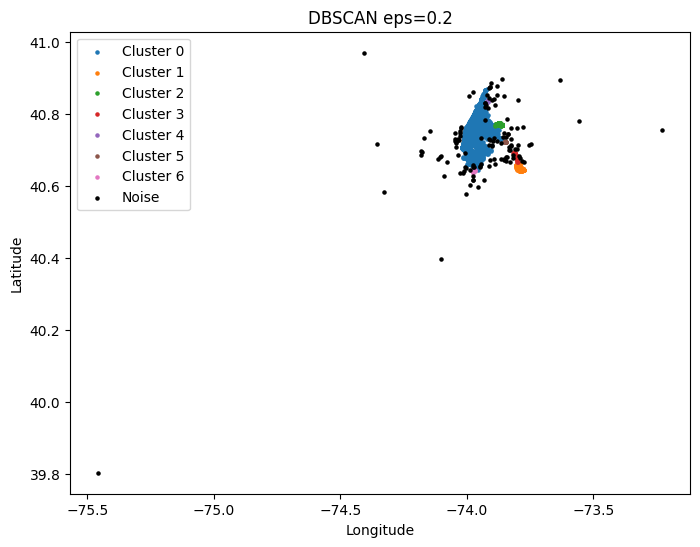

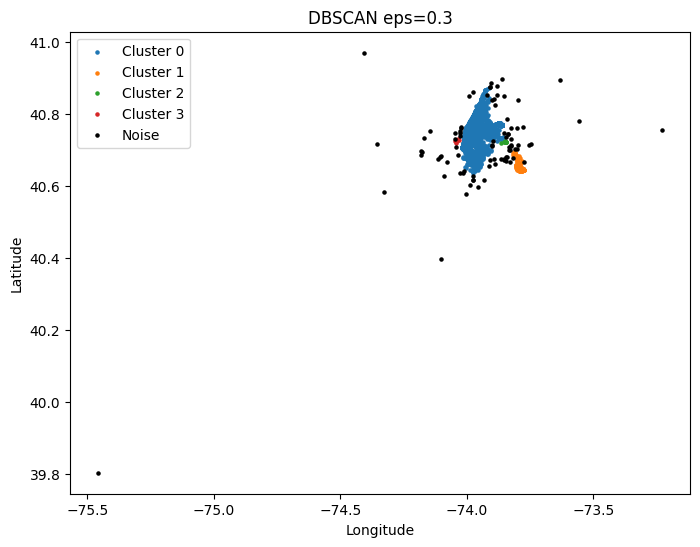

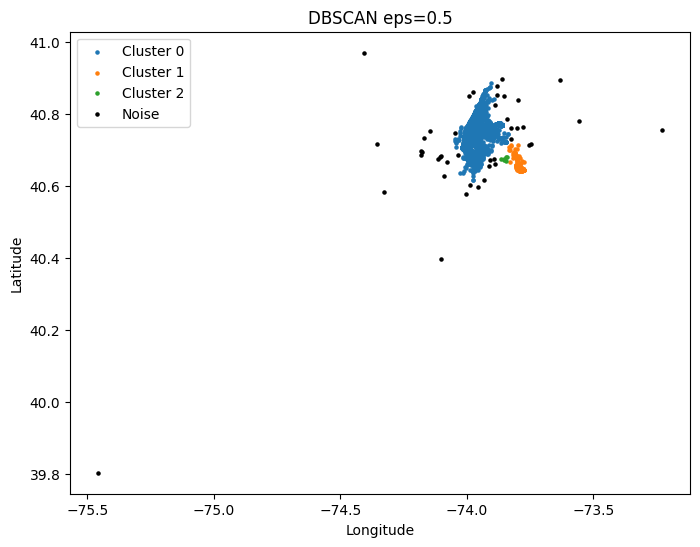

In [34]:
plot_clusters(x_sample, labels_1, "DBSCAN eps=0.2")
plot_clusters(x_sample, labels_2, "DBSCAN eps=0.3")
plot_clusters(x_sample, labels_3, "DBSCAN eps=0.5")


In [35]:
best_eps = None
best_score = -1

for eps in sil_scores:
    if sil_scores[eps] is not None:
        if sil_scores[eps] > best_score:
            best_score = sil_scores[eps]
            best_eps = eps

print("\nBest eps value =", best_eps)



Best eps value = 0.5
